In [132]:
import numpy as np
import pandas as pd
#import seaborn as sns
#import matplotlib.pyplot as plt
#import statsmodels.api as sm
#import statsmodels.formula.api as sm
#from matplotlib.backends.backend_pdf import PdfPages
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, cross_val_predict
#from sklearn.linear_model import LinearRegression,ElasticNet, Ridge
#from sklearn import datasets, linear_model
#from sklearn.decomposition import PCA
df = pd.read_csv('g-23-1.csv')
df = df.loc[:,'Y':]
df = df.fillna(df.mean())
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,242.735970,4.050744,10.769145,4.123897,8.674922,6.139537,3.779659,8.949172,8.367466,4.513108,2.364523,7.799612,0.238113
1,642.440772,2.716199,8.208917,4.123897,23.169812,4.700483,7.377872,0.284465,8.367466,0.395112,2.009410,12.018342,0.031582
2,220.431422,14.158592,3.891063,4.013848,7.431310,5.710987,5.178770,6.543763,5.722775,1.853204,1.512288,8.597083,0.346719
3,275.249360,10.287939,9.214914,4.123897,10.123487,5.626538,7.270041,8.553154,3.290028,3.488337,0.848767,11.027547,0.337279
4,393.732726,8.396844,13.028896,4.134385,13.997420,6.274481,4.208286,1.762689,3.212686,5.793582,1.751620,9.799840,0.316629


In [133]:
# discretizing Y
Yrange = df['Y'].max() - df['Y'].min()

df['Y'] = np.where((df['Y'] < Yrange/5),1,
              np.where((df['Y'] >= Yrange/5) & (df['Y'] < Yrange*2/5),2,
                 np.where((df['Y'] >= Yrange*2/5) & (df['Y'] < Yrange*3/5),3,
                    np.where((df['Y'] >= Yrange*3/5) & (df['Y'] < Yrange*4/5),4,5))))

# discretizing X6
X8range = df['X8'].max() - df['X8'].min()

df['X8'] = np.where((df['X8'] < X8range/5),1,
              np.where((df['X8'] >= X8range/5) & (df['X8'] < X8range*2/5),2,
                 np.where((df['X8'] >= X8range*2/5) & (df['X8'] < X8range*3/5),3,
                    np.where((df['X8'] >= X8range*3/5) & (df['X8'] < X8range*4/5),4,5))))

# discretizing X11
X12range = df['X12'].max() - df['X12'].min()

df['X12'] = np.where((df['X12'] < X12range/3),1,
              np.where((df['X12'] >= X12range/3) & (df['X12'] < X12range*2/3),2,3))

df.to_csv('183100070-73,2.csv', index=False)
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,1,4.050744,10.769145,4.123897,8.674922,6.139537,3.779659,8.949172,3,4.513108,2.364523,7.799612,1
1,3,2.716199,8.208917,4.123897,23.169812,4.700483,7.377872,0.284465,3,0.395112,2.009410,12.018342,1
2,1,14.158592,3.891063,4.013848,7.431310,5.710987,5.178770,6.543763,2,1.853204,1.512288,8.597083,2
3,1,10.287939,9.214914,4.123897,10.123487,5.626538,7.270041,8.553154,1,3.488337,0.848767,11.027547,2
4,2,8.396844,13.028896,4.134385,13.997420,6.274481,4.208286,1.762689,1,5.793582,1.751620,9.799840,2


In [137]:
X8_dummies=pd.get_dummies(df['X8'], prefix='X8', drop_first=True)
X12_dummies=pd.get_dummies(df['X12'], prefix='X12', drop_first=True)
Y_dummies=pd.get_dummies(df['Y'], prefix='Y', drop_first=True)

In [138]:
df1 = pd.concat([df, X8_dummies, X12_dummies, Y_dummies], axis=1)
del df1['X8']
#del df1['X8_2']
#del df1['X8_3']
del df1['X12']
#del df1['X12_2']
del df1['Y']
#del df1['Y_2']
df1.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X9', 'X10', 'X11', 'X8_2',
       'X8_3', 'X8_4', 'X8_5', 'X12_2', 'X12_3', 'Y_2', 'Y_3', 'Y_4', 'Y_5'],
      dtype='object')

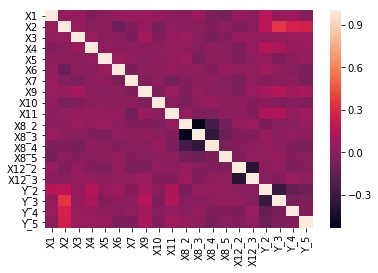

In [139]:
sns.heatmap(df1.corr() )

In [140]:
X = df1.loc[:, 'X1':'X12_3']
Y = df1.loc[:, 'Y_3':'Y_5']

standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X,df['Y'],random_state=0,test_size=0.2)
df1.head()

/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/pranav/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,X1,X2,X3,X4,X5,X6,X7,X9,X10,X11,X8_2,X8_3,X8_4,X8_5,X12_2,X12_3,Y_2,Y_3,Y_4,Y_5
0,4.050744,10.769145,4.123897,8.674922,6.139537,3.779659,8.949172,4.513108,2.364523,7.799612,0,1,0,0,0,0,0,0,0,0
1,2.716199,8.208917,4.123897,23.169812,4.700483,7.377872,0.284465,0.395112,2.009410,12.018342,0,1,0,0,0,0,0,1,0,0
2,14.158592,3.891063,4.013848,7.431310,5.710987,5.178770,6.543763,1.853204,1.512288,8.597083,1,0,0,0,1,0,0,0,0,0
3,10.287939,9.214914,4.123897,10.123487,5.626538,7.270041,8.553154,3.488337,0.848767,11.027547,0,0,0,0,1,0,0,0,0,0
4,8.396844,13.028896,4.134385,13.997420,6.274481,4.208286,1.762689,5.793582,1.751620,9.799840,0,0,0,0,1,0,1,0,0,0


In [141]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7).fit(X_train, Y_train)

knn_predictions = knn_model.predict(X_test)
print(' KNN accuracy: ',accuracy_score(Y_test, knn_predictions)*100,'%')
cm = confusion_matrix(Y_test, knn_predictions)
cm

 KNN accuracy:  56.99999999999999 %


array([[63, 17,  0,  0,  0],
       [41, 50,  2,  0,  0],
       [ 5, 14,  1,  0,  0],
       [ 0,  4,  0,  0,  0],
       [ 0,  2,  1,  0,  0]])

In [142]:
# SVM
from sklearn.svm import SVC
svm_model = SVC(kernel = 'linear', C=1).fit(X_train, Y_train)

svm_predictions = svm_model.predict(X_test)
print(' SVM accuracy: ',accuracy_score(Y_test, svm_predictions)*100,'%')
cm = confusion_matrix(Y_test, svm_predictions)
cm

 SVM accuracy:  75.5 %


array([[67, 13,  0,  0,  0],
       [17, 73,  3,  0,  0],
       [ 0, 10,  9,  1,  0],
       [ 0,  1,  2,  1,  0],
       [ 0,  0,  1,  1,  1]])

In [144]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_features = 0.2, max_depth = 9, n_estimators = 1000, random_state = 123)

model_rf = rfc.fit(X_train, Y_train)
rf_predictions = model_rf.predict(X_test)
print('RF accuracy: ',accuracy_score(Y_test, rf_predictions)*100,'%')
cm = confusion_matrix(Y_test, rf_predictions)
cm

RF accuracy:  74.0 %


array([[70, 10,  0,  0,  0],
       [19, 74,  0,  0,  0],
       [ 1, 15,  4,  0,  0],
       [ 0,  2,  2,  0,  0],
       [ 0,  1,  2,  0,  0]])

In [145]:
# DECISION TREE
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, Y_train)

dtree_predictions = dtree_model.predict(X_test)
print(' Decision Tree accuracy: ',accuracy_score(Y_test, dtree_predictions)*100,'%')
cm = confusion_matrix(Y_test, dtree_predictions)
cm

 Decision Tree accuracy:  69.0 %


array([[59, 21,  0,  0,  0],
       [20, 71,  2,  0,  0],
       [ 1, 11,  8,  0,  0],
       [ 0,  1,  3,  0,  0],
       [ 0,  0,  3,  0,  0]])